In [351]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [352]:
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [353]:
## explicação das colunas

# 1 - age (numeric) : idade do cliente
# 2 - job : tipo de trabalho do cliente (categórico)
# 3 - marital : estado civil do cliente (categórico)
# 4 - education (categórico) : nível de educação do cliente
# 5 - default: tem crédito em default? (categórico)
# 6 - housing: tem empréstimo imobiliário? (categórico)
# 7 - loan: tem empréstimo pessoal? (categórico)
# 8 - contact: tipo de comunicação do contato (categórico)
# 9 - month: mês do último contato (categórico)
# 10 - day_of_week: dia da semana do último contato (categórico)
# 11 - duration: duração do último contato, em segundos (numérico).
# Nota: esse atributo afeta muito o target output (por exemplo, se duration=0, y='no'). No entanto, a duração não é conhecida antes de uma chamada ser realizada.
# Além disso, após o fim da chamada, y é obviamente conhecido. Assim, essa entrada deve ser incluída apenas para fins de benchmark 
# e deve ser descartada se a intenção for ter um modelo preditivo realista.
# 12 - campaign: número de contatos realizados durante esta campanha e para este cliente (numérico, incluindo o último contato)
# 13 - pdays: número de dias que passaram após o último contato para este cliente (numérico; 999 significa que o cliente não foi contatado anteriormente)
# 14 - previous: número de contatos realizados antes desta campanha e para este cliente (numérico)
# 15 - poutcome: resultado da campanha de marketing anterior (categórico)
# 16 - emp.var.rate: taxa de variação do emprego - indicador trimestral (numérico)
# 17 - cons.price.idx: índice de preços ao consumidor - indicador mensal (numérico)
# 18 - cons.conf.idx: índice de confiança do consumidor - indicador mensal (numérico)
# 19 - euribor3m: taxa euribor a 3 meses - indicador diário (numérico)
# 20 - nr.employed: número de empregados - indicador trimestral (numérico)
# 21 - y - tem o cliente assinado um depósito a prazo? (binário)



# Colocar sobre o dataset não ter valores faltantes


In [354]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [355]:
# Antes vamos fazer uma cópia do dataframe original
df_copy = df.copy()

# renomear a coluna y para status
df_copy.rename(columns={'y': 'status'}, inplace=True)

In [356]:
# Vamos transformar as variáveis categóricas em numéricas
# Para isso vamos usar o método get_dummies do pandas
# Vamos criar um novo dataframe com as variáveis categóricas
df_cat = df_copy[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 
                  'poutcome', 'status']]
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,status
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [357]:
df_cat.shape

(41188, 11)

In [358]:
# removendo linhas que tiverem valor "unknow"
df_cat = df_cat[df_cat['job'] != 'unknown']
df_cat = df_cat[df_cat['education'] != 'unknown']
df_cat = df_cat[df_cat['contact'] != 'unknown']

In [359]:
df_cat.shape

(39258, 11)

In [360]:
# Transformando 
df_cat = pd.get_dummies(df_copy, columns=['status','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 
                                         'month', 'day_of_week', 'poutcome'], drop_first=True)
df_cat.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [361]:
df_cat.groupby('status_yes').size()

status_yes
0    36548
1     4640
dtype: int64

In [362]:
df_num = df_copy[['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
                  'cons.conf.idx', 'euribor3m', 'nr.employed']]

In [363]:
df_num.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [364]:
# Concatenando os dois dataframes
df_final = pd.concat([df_num, df_cat], axis=1)

In [365]:
# ver o tipo de dados
df_final.dtypes
# transformar em float
df_final = df_final.astype(float)

In [366]:
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

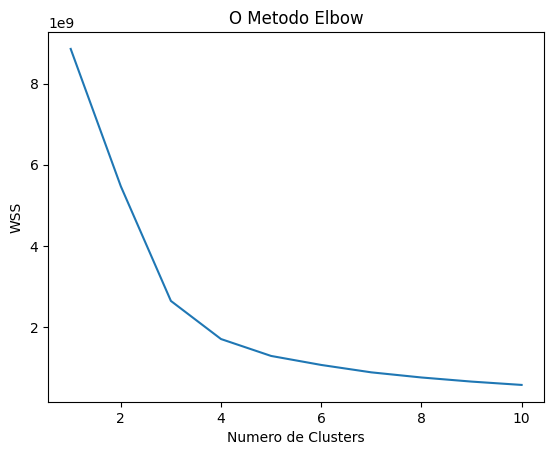

In [370]:
# checar o numero de clustes com o metodo do cotovelo
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=RANDOM_SEED)
    kmeans.fit(df_final)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('O Metodo Elbow')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS')
plt.show()

# Achar o ponto ideial usando distancia euclidiana


In [373]:

x1, y1 = 2, wcss[0]
x2, y2 = 20, wcss[len(wcss)-1]

distances = []
for i in range(len(wcss)):
    x0 = i+2
    y0 = wcss[i]
    numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
    denominator = ((y2 - y1)**2 + (x2 - x1)**2)**(1/2)
    distances.append(numerator/denominator)

n_cluster = distances.index(max(distances)) + 2
print('Numero de Clusters:', n_cluster)

Numero de Clusters: 5


c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


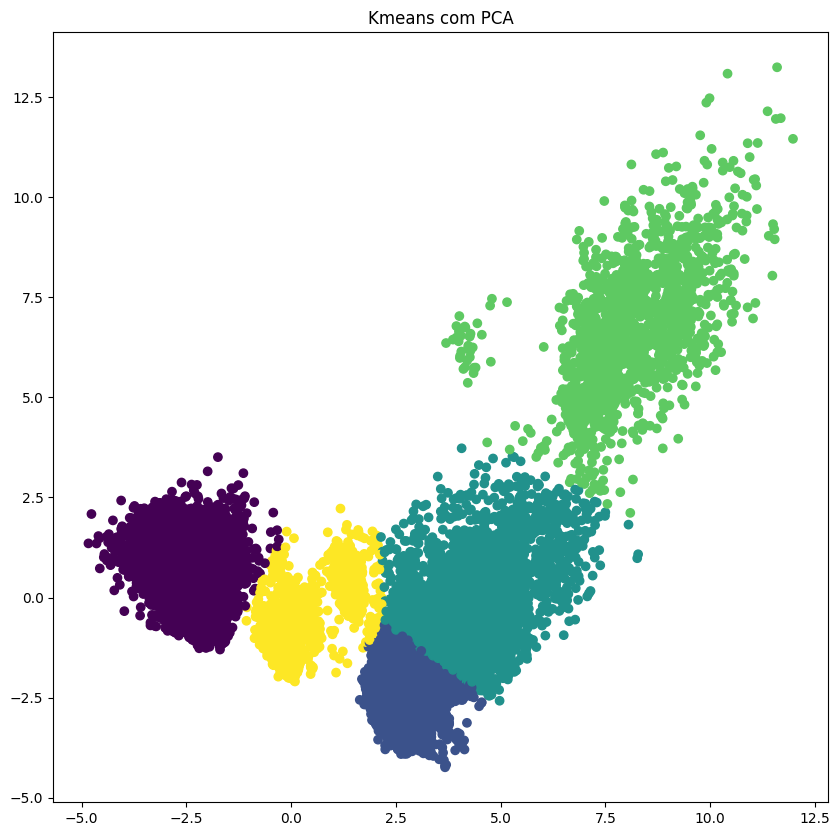

In [375]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans

# pca
pca = PCA(n_components=2)

# Normalizar os dados
scaler = StandardScaler()

# Aplique o K-means aos dados normalizados
kmeans = KMeans(n_clusters=5, random_state=42)

X = df_final.copy()

# criar o pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('pca', pca)
])

# fit_transform
X_pca = pipeline.fit_transform(X)

# fit
kmeans.fit(X_pca)

# predict
y_pred = kmeans.predict(X_pca)

# plotar o gráfico
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.title('Kmeans com PCA')
plt.show()

    

In [377]:
# Feito isso, temos a variável y_pred que contém os clusters de cada cliente.
# Vamos adicionar essa variável ao nosso dataframe original
df_final['cluster'] = y_pred

In [378]:
df_final.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,cluster
0,56.0,261.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
1,57.0,149.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,37.0,226.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
3,40.0,151.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0
4,56.0,307.0,1.0,999.0,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0


In [379]:
# Vamos entender as caracteristicas de cada cluster
# Para isso vamos usar o método groupby do pandas
df_final.groupby('cluster').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
cluster,,,,,,,,,,,,,,,,,,,,,
0,40.131856,253.702386,2.937654,999.00000,0.000000,1.302070,93.939982,-39.075286,4.923209,5216.085015,...,0.323310,0.000000,0.000625,0.000000,0.202199,0.202366,0.204406,0.205406,1.000000,0.00000
1,36.598075,253.337320,2.245443,999.00000,0.009479,-1.895654,92.977242,-45.591454,1.300868,5092.192125,...,0.585533,0.008604,0.004229,0.000000,0.242380,0.219338,0.167420,0.169608,0.990521,0.00000
2,42.920995,278.647640,1.960498,999.00000,0.730199,-2.202943,92.991483,-40.021568,1.070079,5059.587833,...,0.343867,0.052933,0.089670,0.076437,0.206004,0.209955,0.192376,0.188623,0.349595,0.00000
3,42.481198,323.369025,1.829191,40.18993,1.697897,-2.101275,93.343480,-38.207967,0.979627,5028.205099,...,0.159337,0.122371,0.107075,0.116635,0.202677,0.224984,0.214786,0.195666,0.000000,0.87508
4,40.669740,241.676247,1.904826,999.00000,0.189262,-0.119957,93.217139,-41.970255,4.085592,5193.424458,...,0.000000,0.971258,0.014100,0.000000,0.172451,0.228850,0.196041,0.210683,0.810738,0.00000


In [381]:
# Vamos criar um dataframe para cada cluster
# Vamos usar o método copy do pandas
df_cluster_0 = df_final[df_final['cluster'] == 0].copy()
df_cluster_1 = df_final[df_final['cluster'] == 1].copy()
df_cluster_2 = df_final[df_final['cluster'] == 2].copy()
df_cluster_3 = df_final[df_final['cluster'] == 3].copy()
df_cluster_4 = df_final[df_final['cluster'] == 4].copy()

# Vamos remover a coluna cluster
df_cluster_0.drop('cluster', axis=1, inplace=True)
df_cluster_1.drop('cluster', axis=1, inplace=True)
df_cluster_2.drop('cluster', axis=1, inplace=True)
df_cluster_3.drop('cluster', axis=1, inplace=True)
df_cluster_4.drop('cluster', axis=1, inplace=True)



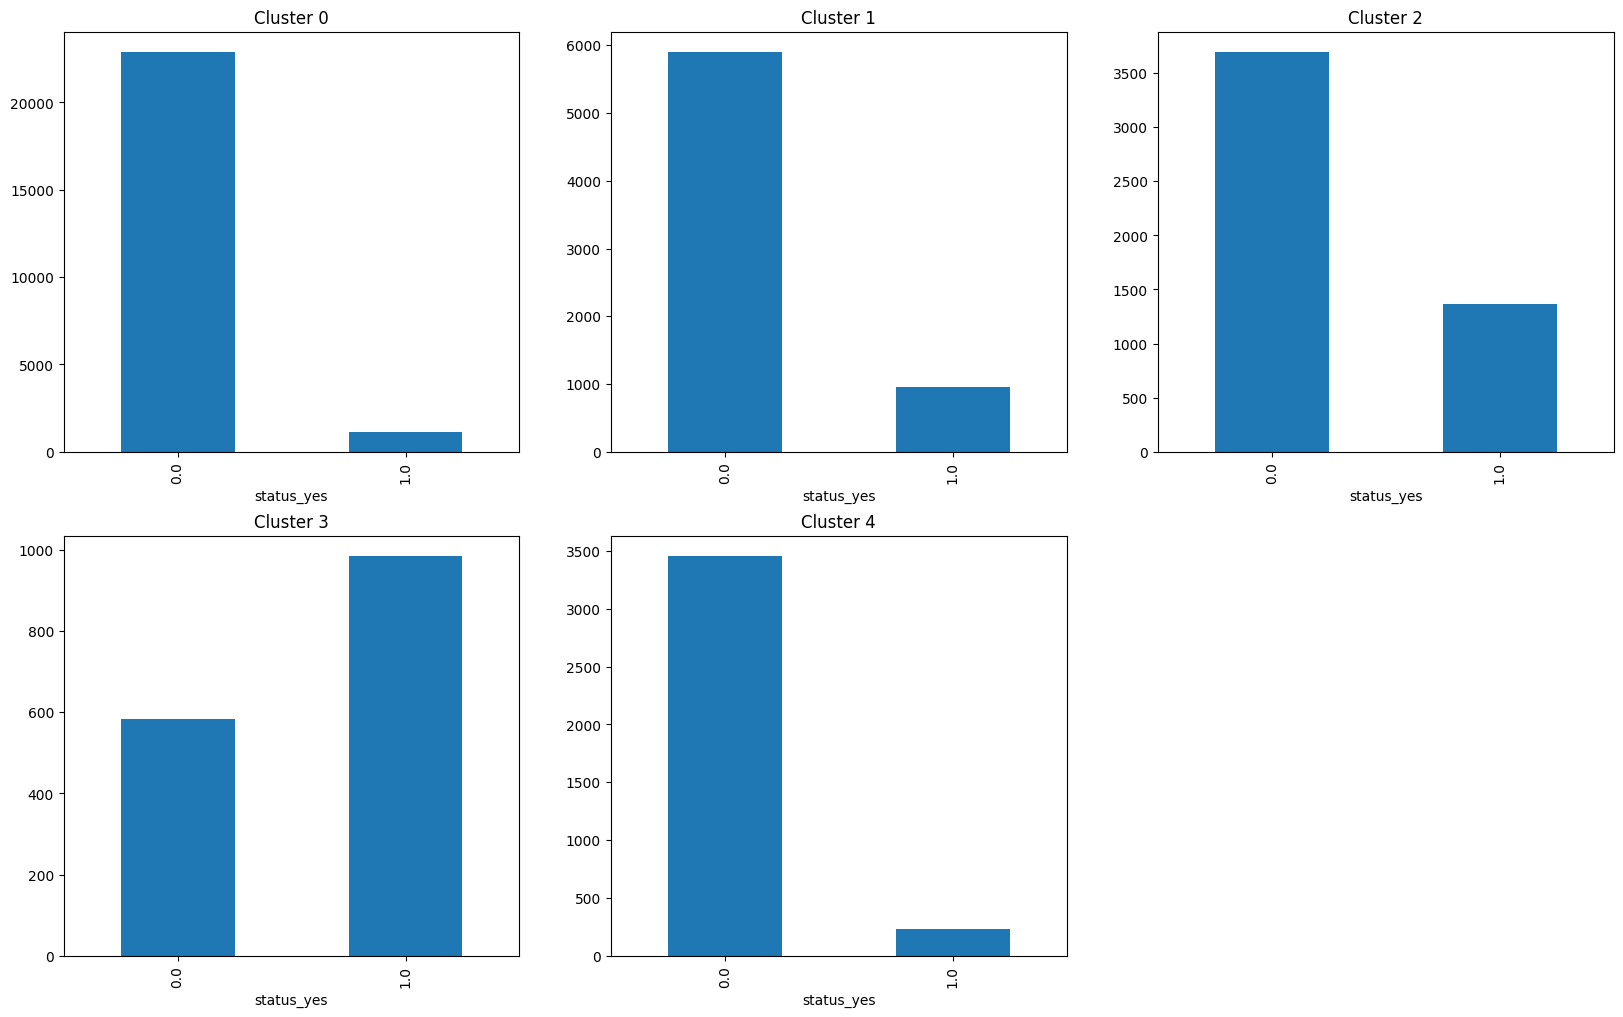

In [390]:
# vamos plotar o gráfico de barras para cada cluster
# vamos usar o método plot do pandas

plt.figure(figsize=(20, 12))
plt.subplot(2, 3, 1)
plt.title('Cluster 0')
df_cluster_0.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 2)
plt.title('Cluster 1')
df_cluster_1.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 3)
plt.title('Cluster 2')
df_cluster_2.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 4)
plt.title('Cluster 3')
df_cluster_3.groupby('status_yes').size().plot.bar()

plt.subplot(2, 3, 5)
plt.title('Cluster 4')
df_cluster_4.groupby('status_yes').size().plot.bar()

plt.show()


In [470]:
# função para plotar o gráfico de barras media de cada cluster
def plot_cluster_bar(column):
    if column == 'emp.var.rate' or column == 'cons.conf.idx':
        plt.bar(0, abs(df_cluster_0[column].mean()), color='green', label='Cluster 0', alpha=0.5)
        plt.bar(1, abs(df_cluster_1[column].mean()), color='red', label='Cluster 1', alpha=0.5)
        plt.bar(2, abs(df_cluster_2[column].mean()), color='blue', label='Cluster 2', alpha=0.5)
        plt.bar(3, abs(df_cluster_3[column].mean()), color='yellow', label='Cluster 3', alpha=0.5)
        plt.bar(4, abs(df_cluster_4[column].mean()), color='orange', label='Cluster 4', alpha=0.5)
        plt.title('Média de {}(módulo)'.format(column))
    else:
        plt.bar(0, df_cluster_0[column].mean(), color='green', label='Cluster 0', alpha=0.5)
        plt.bar(1, df_cluster_1[column].mean(), color='red', label='Cluster 1', alpha=0.5)
        plt.bar(2, df_cluster_2[column].mean(), color='blue', label='Cluster 2', alpha=0.5)
        plt.bar(3, df_cluster_3[column].mean(), color='yellow', label='Cluster 3', alpha=0.5)
        plt.bar(4, df_cluster_4[column].mean(), color='orange', label='Cluster 4', alpha=0.5)

        plt.title('Média de {}'.format(column))
     

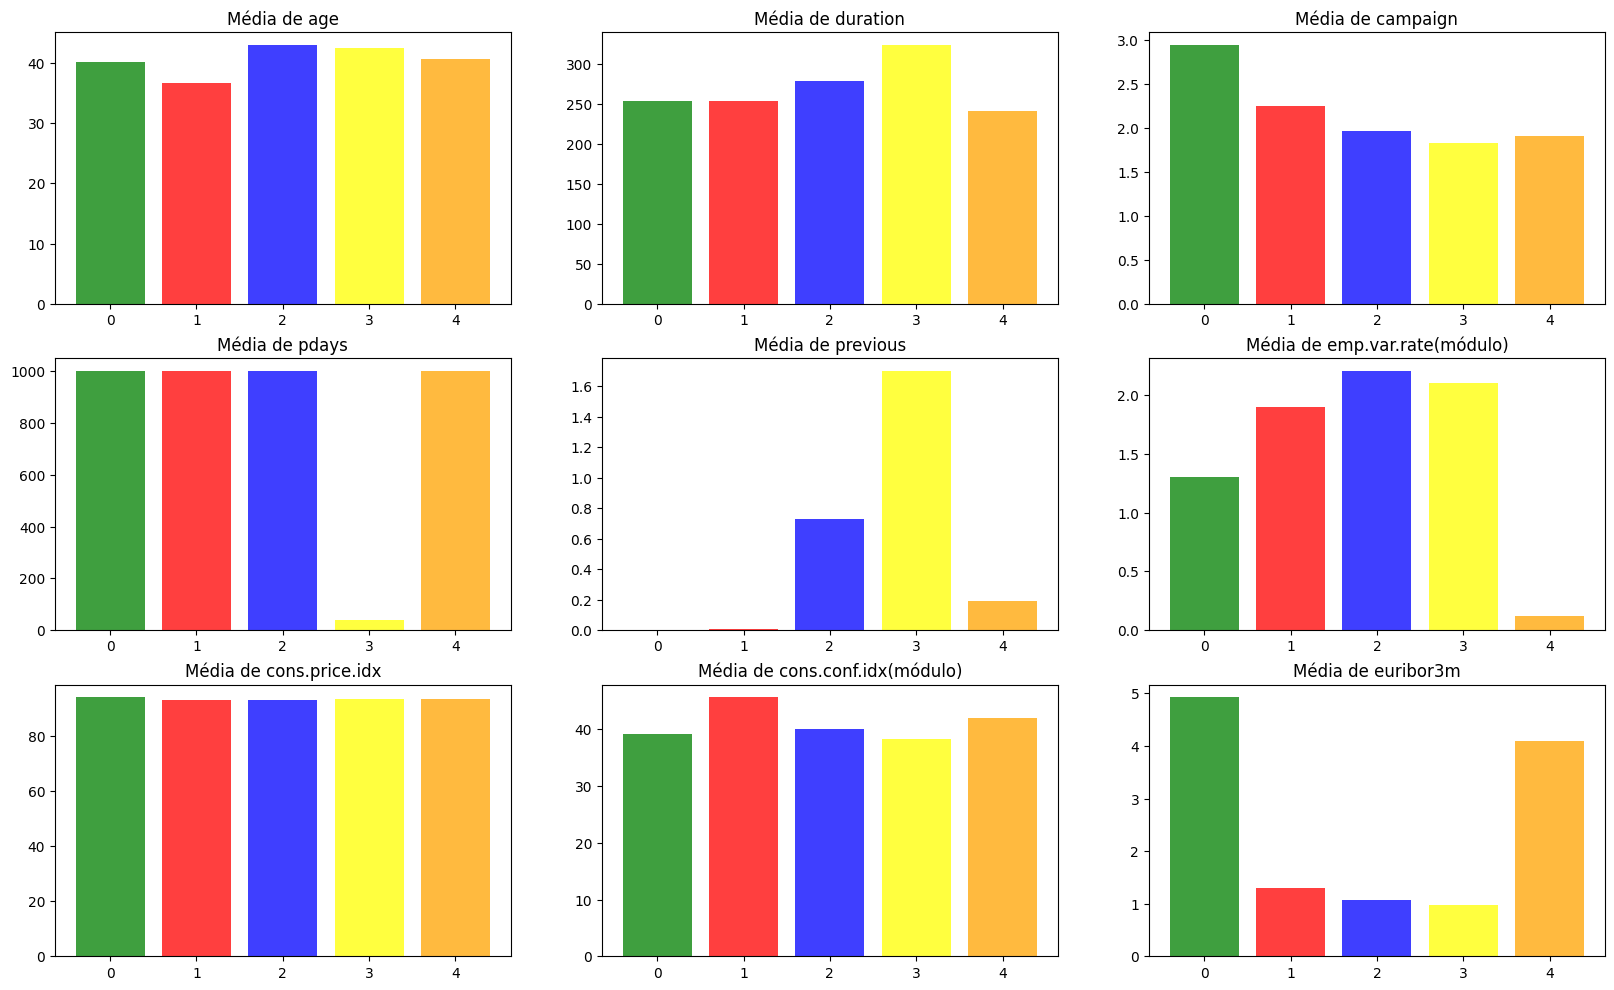

In [471]:
# Análise dos clusters


# Media de idade por cluster
plt.figure(figsize=(20, 12))

plt.subplot(3, 3, 1)
plot_cluster_bar('age')

# Media de duração por cluster
plt.subplot(3, 3, 2)
plot_cluster_bar('duration')

# Media de campanha por cluster
plt.subplot(3, 3, 3)
plot_cluster_bar('campaign')

# Media de pdays por cluster
plt.subplot(3, 3, 4)
plot_cluster_bar('pdays')

# Media de previous por cluster
plt.subplot(3, 3, 5)
plot_cluster_bar('previous')

# Media de emp.var.rate por cluster
plt.subplot(3, 3, 6)
plot_cluster_bar('emp.var.rate')

# Media de cons.price.idx por cluster
plt.subplot(3, 3, 7)
plot_cluster_bar('cons.price.idx')

# Media de cons.conf.idx por cluster
plt.subplot(3, 3, 8)
plot_cluster_bar('cons.conf.idx')

# Media de euribor3m por cluster

plt.subplot(3, 3, 9)
plot_cluster_bar('euribor3m')

plt.show()





c:\Users\hudso\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


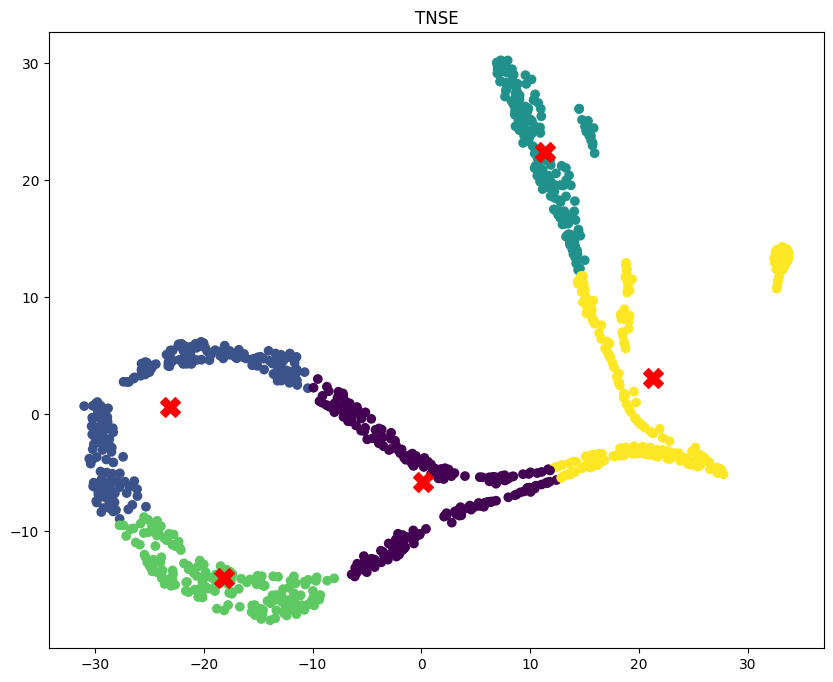

In [478]:
# Outra análise do dataSet original será feita usando TNSE
# TNSE é uma técnica de redução de dimensionalidade não linear bem poderosa
# Vamos usar o método TSNE do sklearn
from sklearn.manifold import TSNE

# dado que temos o dataframe df_final, vamos aplicar o TSNE
# vamos usar o método fit_transform
X = df_final.copy()
# pegar uma mostra de 1000 linhas
X_sample = X.sample(1000)
X_tsne = TSNE(n_components=2, perplexity=50, random_state=42).fit_transform(X_sample)

# fit
kmeans.fit(X_tsne)
y_pred_1 = kmeans.predict(X_tsne)


# plotar o gráfico
# Plotar o gráfico
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred_1)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title('TNSE')
plt.show()